<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.Exploración del conjunto de datos




Cargamos el conjunto de datos del vino de sklearn.datasets.load_wine() en un DataFrame, tipos de variables, algunas estadísticas y la distribución de clases objetivo.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, ParameterGrid, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]
target_names = dataset["target_names"]

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

print(df.head())
print(f"Dimensiones: {df.shape}")
df.info()
display(df.describe().T)

print("\nConteo de muestras por clase:")
print(df["target"].value_counts(sort=False))


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines  178.0    2.611685    0.709990    1.27    1.9375   
proline                       178.0  746.893258  314.907474  278.00  500.5000   
target                        178.0    0.938202    0.775035    0.00    0.0000   

                                  50%       75%      max  
alcohol                        13.050   13.6775    14.83  
malic_acid                      1.865    3.0825     5.80  
ash                             2.360    2.5575     3.23  
alcalinity_of_ash              19.500   21.5000    30.00  
magnesium                      98.000  107.0000   162.00  
total_phenols                   2.355    2.8000     3.88  
flavanoids                      2.135    2.8750     5.08  
nonflavanoid_phenols            0.340    0.4375     0.66  
proanthocyanins                 1.555    1.9500     3.58  
color_intensity                 4.690    6.2000    13.00  
hue                             0.965    1.1200     1.71  
od280/od315_of_diluted_wines    2.780    3.1700     4.00  
proline                       673.500  985.0000  1680.00  
target                          1.000    2.0000     2.00


Conteo de muestras por clase:
target
0    59
1    71
2    48
Name: count, dtype: int64


El conjunto de datos tiene 178 registros y 14 columnas en total, de las cuales 13 son características descriptivas y una es la columna objetivo. No hay valores faltantes, todas las columnas tienen 178 datos válidos, lo que indica que no existen datos perdidos en este conjunto.

Todas las variables son numéricas y continuas, representan diferentes mediciones químicas del vino. La columna objetivo, llamada target, es un número entero que clasifica cada muestra en una de tres categorías distintas (0, 1 o 2).

En cuanto a los valores promedio, las variables muestran diferentes escalas. Por ejemplo, el grado alcohólico tiene una media cercana a 13, el ácido málico ronda los 2.3, la intensidad de color está alrededor de 5 y la cantidad de prolina tiene una media cercana a 746. Algunas variables varían en centenas, como Proline, mientras que otras como Ash o Hue lo hacen en valores pequeños o decimales.


La columna objetivo tiene tres clases con la siguiente distribución: 59 muestras pertenecen a la clase 0, 71 a la clase 1 y 48 a la clase 2. Aunque no es un conjunto perfectamente balanceado, la diferencia no es demasiado grande. Aproximadamente el 33 por ciento de los registros pertenece a la clase 0, el 40 por ciento a la clase 1 y el 27 por ciento a la clase 2.

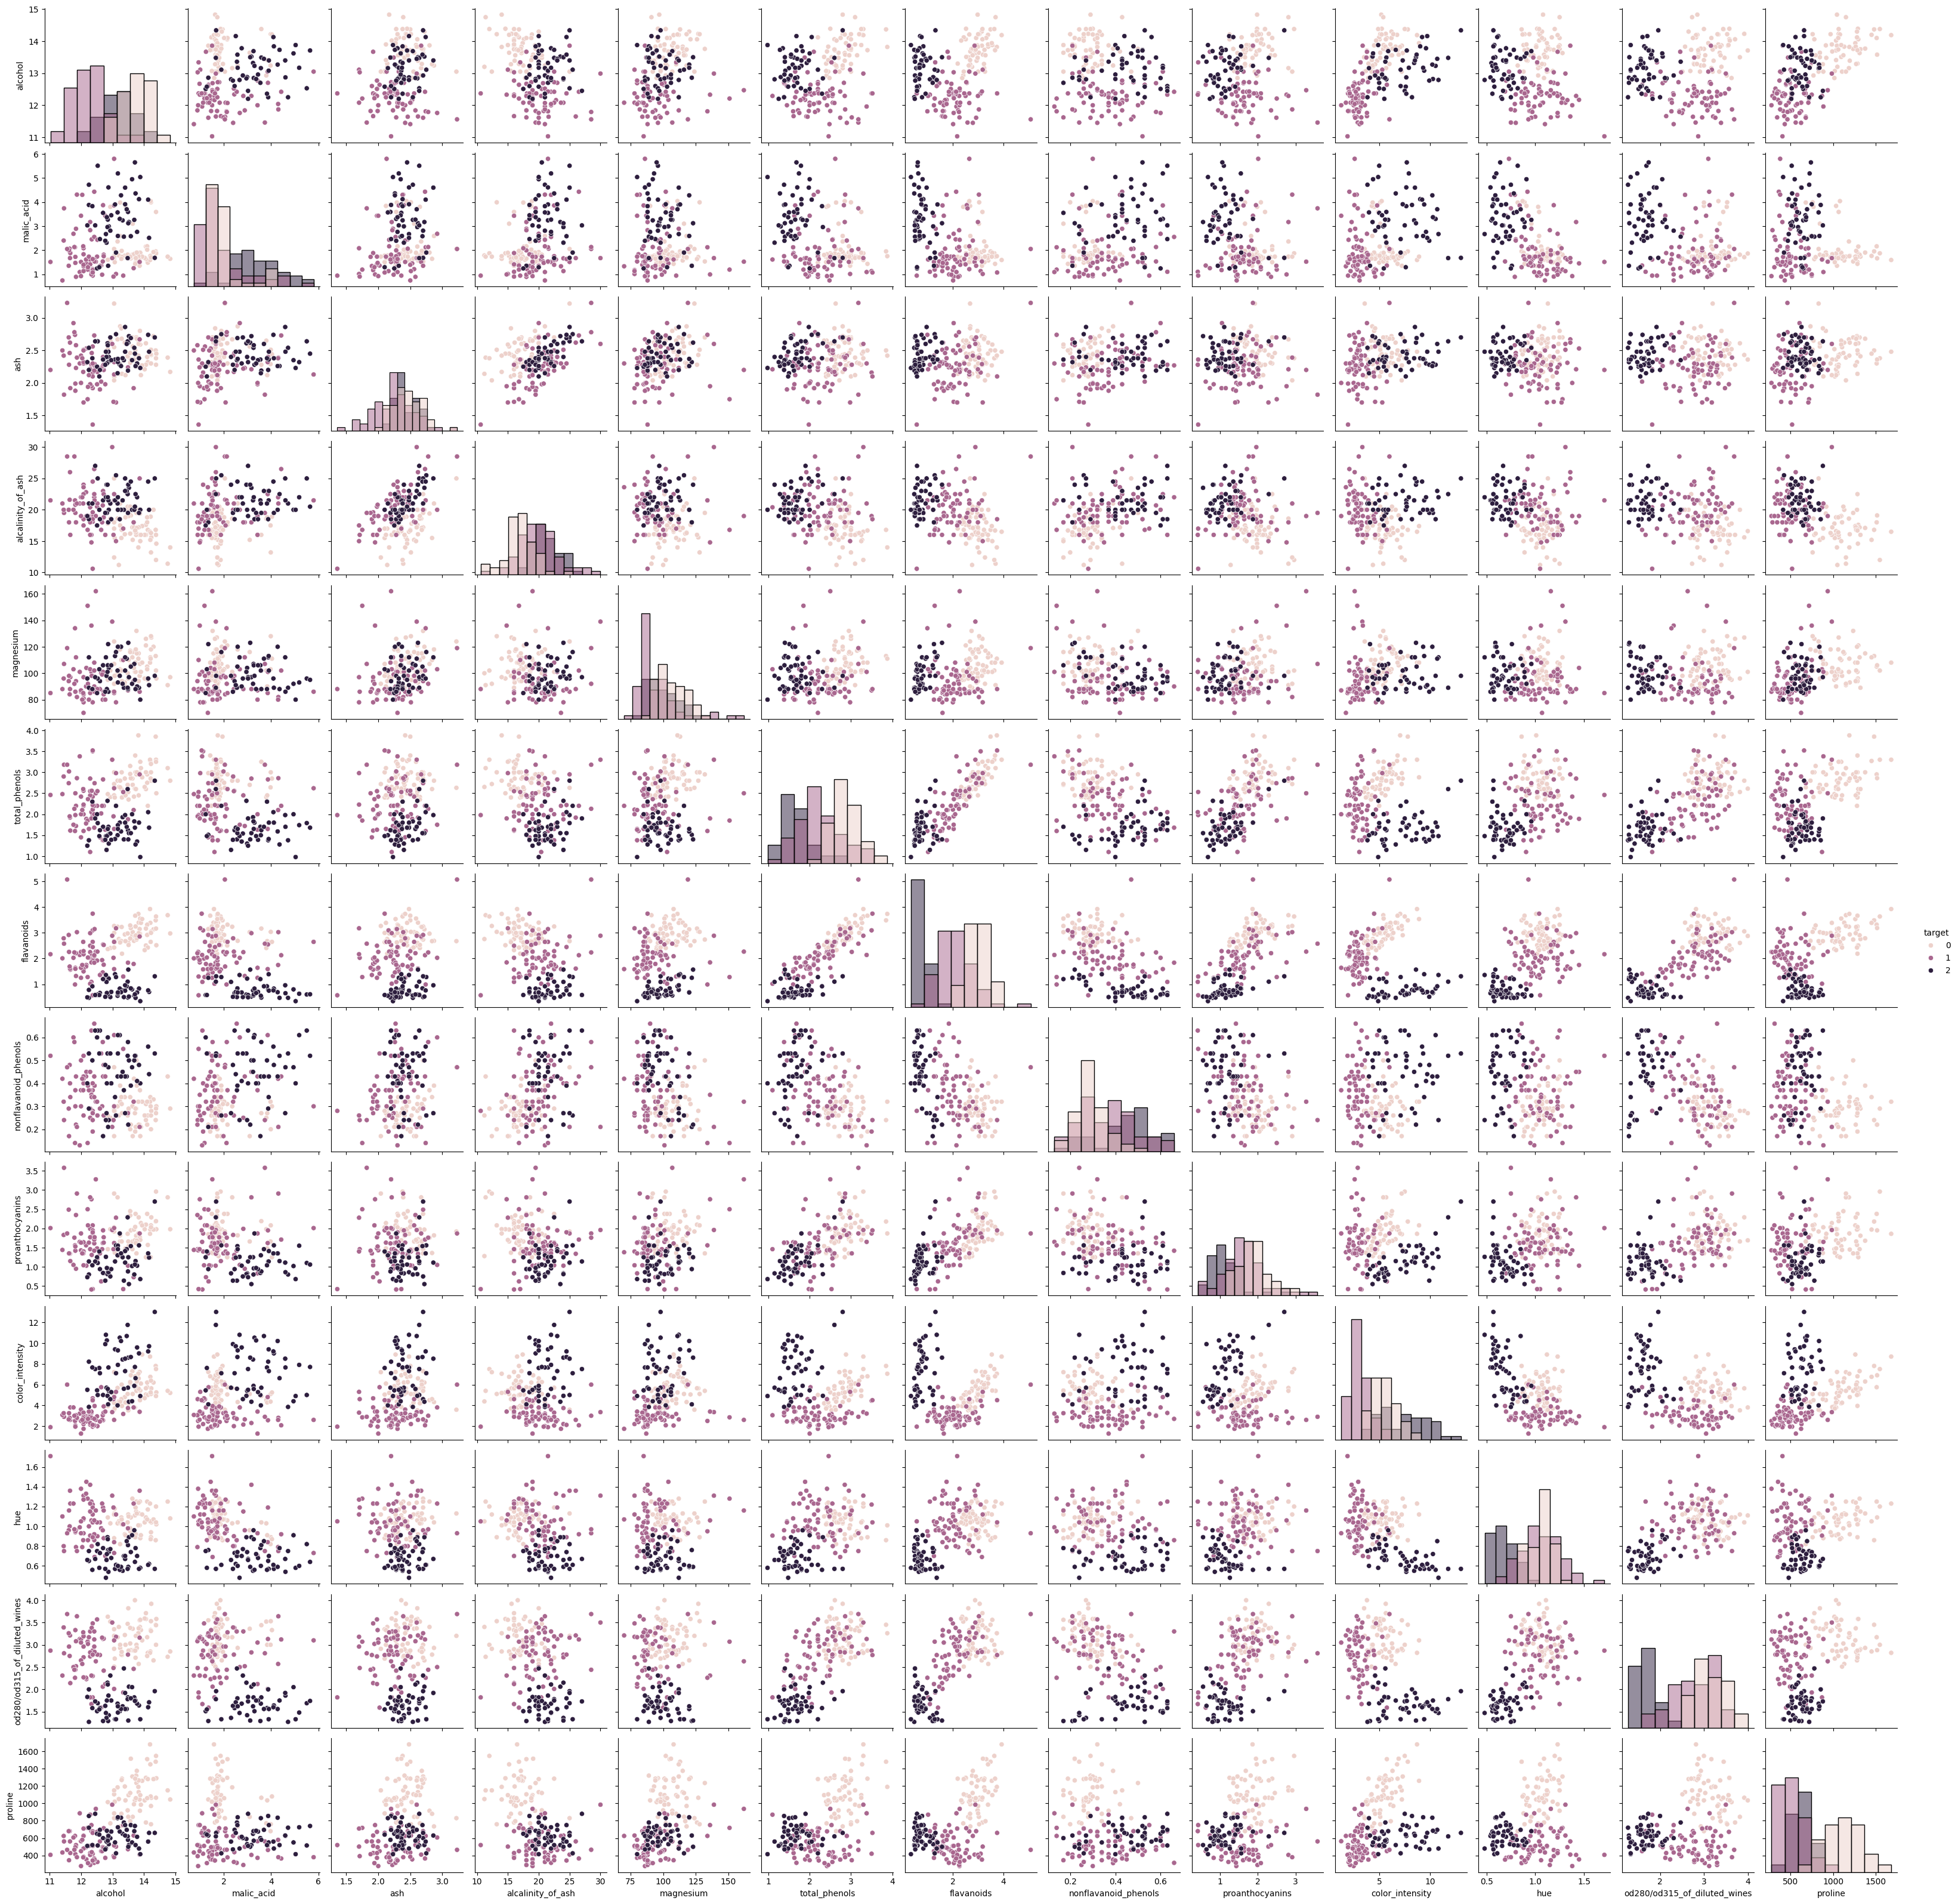

In [3]:

sns.pairplot(df, hue="target", corner=False, diag_kind="hist")
plt.show()


 En la matriz de gráficos de pares, cada punto está coloreado según la clase de vino. Podemos apreciar que las tres clases tienden a formar grupos distintos en ciertas proyecciones de pares de variables. Por ejemplo, los vinos de la clase 0 tienden a tener valores más altos de flavonoides y prolina, mientras que los de clase 2 destacan por una alta intensidad de color pero bajo contenido de flavonoides. La clase 1 (que es la más numerosa) suele presentar valores intermedios en varias características (por ejemplo, menor alcohol y prolina que clase 0, pero más flavonoides que clase 2).El pairplot sugiere que el conjunto es linealmente separable en cierta medida usando algunas combinaciones de características. Aunque existe solapamiento en algunos pares de dimensiones, por lo que ninguna única pareja de variables separa completamente las tres clases.

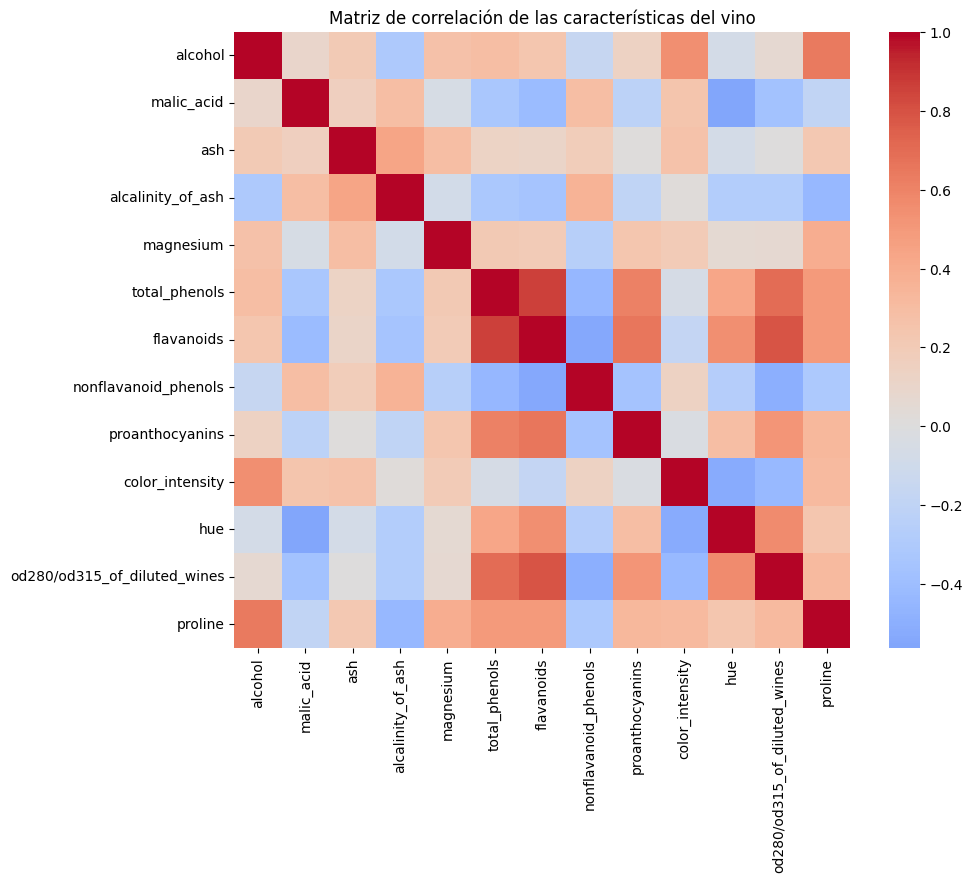

In [5]:
plt.figure(figsize=(10, 8))
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=True)
plt.title("Matriz de correlación de las características del vino")
plt.show()


En el mapa de calor los tonos rojos representan correlación positiva fuerte y los azules correlación negativa fuerte entre pares de características. Vemos varios patrones destacables: por ejemplo, existe alta correlación positiva entre total_phenols, flavanoids y od280/od315_of_diluted_wines (estas variables relacionadas con compuestos fenólicos tienden a aumentar o disminuir conjuntamente). De hecho, el valor de correlación entre flavonoides y la absorbancia OD280/OD315 es cercano a 0.79, indicando una asociación muy fuerte. Asimismo, total_phenols y flavanoids también correlacionan fuertemente. Otra correlación positiva notable es entre color_intensity y proline (vinos con color más intenso suelen tener mayor contenido de prolina). Por otro lado, observamos correlaciones negativas: por ejemplo, malic_acid tiene correlación inversa con varias medidas de fenoles (es decir, vinos con más ácido málico tienden a tener ligeramente menos fenoles totales y flavonoides). En general, estas correlaciones sugieren que algunas características aportan información redundante (flavonoids vs. OD280), lo cual podría influir en las decisiones del árbol (el modelo podría basarse en una de ellas sin perder mucha información).

Entrenamos un DecisionTreeClassifier con toda la información disponible y calculamos la accuracy sobre el mismo conjunto.

In [7]:
clf_all = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_all.fit(X, y)
y_pred_all = clf_all.predict(X)
acc_all = accuracy_score(y, y_pred_all)
print(f"Accuracy entrenando y probando en el MISMO dataset: {acc_all:.4f}")


Accuracy entrenando y probando en el MISMO dataset: 1.0000


La precisión resultante es muy alta (cercana a 1) porque el modelo está siendo evaluado con los mismos datos que utilizó para entrenar. En un árbol de decisión sin restricciones, es posible ajustar perfectamente todos los datos de entrenamiento, obteniendo 100% de accuracy en ese mismo conjunto.

## 6.1.División del conjunto en train/test

Comparamos tres formas de dividir el dataset:
1. Sin mezclar (`shuffle=False`)
2. Mezclando aleatoriamente (`shuffle=True`)
3. Estratificando por clase (`stratify=y`)

Para cada opción, entrenamos un árbol.


In [9]:
def resumen_clases(y_arr):
    vals, cnts = np.unique(y_arr, return_counts=True)
    tot = len(y_arr)
    return pd.DataFrame({
        "clase": vals,
        "conteo": cnts,
        "porcentaje": (cnts / tot * 100).round(2)
    })

# Opción 1:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X, y, test_size=0.2, shuffle=False)
clf1 = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf1.fit(X_tr1, y_tr1)
acc1 = accuracy_score(y_te1, clf1.predict(X_te1))

# Opción 2:
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_STATE)
clf2 = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf2.fit(X_tr2, y_tr2)
acc2 = accuracy_score(y_te2, clf2.predict(X_te2))

# Opción 3:
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)
clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf3.fit(X_tr3, y_tr3)
acc3 = accuracy_score(y_te3, clf3.predict(X_te3))

# Tabla
resumenes = []
for name, y_part, label in [
    ("train_sin_shuffle", y_tr1, "train_sin_shuffle"),
    ("test_sin_shuffle", y_te1, "test_sin_shuffle"),
    ("train_shuffle", y_tr2, "train_shuffle"),
    ("test_shuffle", y_te2, "test_shuffle"),
    ("train_stratify", y_tr3, "train_stratify"),
    ("test_stratify", y_te3, "test_stratify"),
]:
    df_tmp = resumen_clases(y_part)
    df_tmp["conjunto"] = label
    resumenes.append(df_tmp)

tabla_clases = pd.concat(resumenes, ignore_index=True)
tabla_acc = pd.DataFrame({
    "opción": ["sin_shuffle", "shuffle", "stratify"],
    "accuracy_test": [acc1, acc2, acc3]
})

display(tabla_clases)
display(tabla_acc)


clase  conteo  porcentaje           conjunto
0       0      59       41.55  train_sin_shuffle
1       1      71       50.00  train_sin_shuffle
2       2      12        8.45  train_sin_shuffle
3       2      36      100.00   test_sin_shuffle
4       0      45       31.69      train_shuffle
5       1      57       40.14      train_shuffle
6       2      40       28.17      train_shuffle
7       0      14       38.89       test_shuffle
8       1      14       38.89       test_shuffle
9       2       8       22.22       test_shuffle
10      0      47       33.10     train_stratify
11      1      57       40.14     train_stratify
12      2      38       26.76     train_stratify
13      0      12       33.33      test_stratify
14      1      14       38.89      test_stratify
15      2      10       27.78      test_stratify

opción  accuracy_test
0  sin_shuffle       0.916667
1      shuffle       0.944444
2     stratify       0.944444

El valor de precisión más razonable en la prueba suele obtenerse cuando usamos una división estratificada. En este caso, el modelo alcanza una precisión cercana al 0.94, mientras que las otras opciones rondan valores entre 0.92 y 0.94. La razón es que la estratificación mantiene la misma proporción de clases tanto en el conjunto de entrenamiento como en el de prueba, haciendo que los resultados sean más estables y reflejen mejor el rendimiento real del modelo. De esta forma, se evitan variaciones extrañas provocadas por divisiones que dejan las clases mal representadas.

Usar stratify=y cuando el conjunto de datos es pequeño o las clases no están equilibradas. En estos casos, una división completamente aleatoria podría dejar fuera algunas clases del conjunto de prueba o de entrenamiento, lo que distorsionaría las métricas y daría una falsa idea del rendimiento. Estratificar garantiza que todos los grupos estén representados y que la evaluación del modelo sea justa y consistente.

La opción de no mezclar los datos (shuffle=False) puede ser problemática porque toma los primeros registros para entrenar y los últimos para probar, siguiendo el orden original del dataset. Si las muestras están ordenadas por clase o presentan algún tipo de patrón, el modelo podría entrenarse sin ver ciertos tipos de ejemplos, lo que afectaría su capacidad para generalizar. Por ejemplo, si todas las muestras de una clase se encuentran al final del archivo, el modelo no aprendería nada sobre ellas. Incluso cuando los datos no están ordenados, no mezclarlos puede alterar las proporciones entre los conjuntos, haciendo que el modelo parezca mejor o peor de lo que realmente es.

## 6.2: Evaluación de métricas (Precision, Recall, F1-score)


In [10]:
y_pred3 = clf3.predict(X_te3)

# Reporte por clase
print(classification_report(y_te3, y_pred3, target_names=target_names, digits=4))

# Métricas agregadas
prec_macro = precision_score(y_te3, y_pred3, average="macro")
rec_macro  = recall_score(y_te3, y_pred3, average="macro")
f1_macro   = f1_score(y_te3, y_pred3, average="macro")

prec_weighted = precision_score(y_te3, y_pred3, average="weighted")
rec_weighted  = recall_score(y_te3, y_pred3, average="weighted")
f1_weighted   = f1_score(y_te3, y_pred3, average="weighted")

print(f"\nMacro     -> Precision: {prec_macro:.4f}, Recall: {rec_macro:.4f}, F1: {f1_macro:.4f}")
print(f"Weighted  -> Precision: {prec_weighted:.4f}, Recall: {rec_weighted:.4f}, F1: {f1_weighted:.4f}")


              precision    recall  f1-score   support

     class_0     1.0000    0.9167    0.9565        12
     class_1     0.8750    1.0000    0.9333        14
     class_2     1.0000    0.9000    0.9474        10

    accuracy                         0.9444        36
   macro avg     0.9583    0.9389    0.9457        36
weighted avg     0.9514    0.9444    0.9450        36


Macro     -> Precision: 0.9583, Recall: 0.9389, F1: 0.9457
Weighted  -> Precision: 0.9514, Recall: 0.9444, F1: 0.9450


La accuracy por sí sola puede ser engañosa; por ejemplo, un modelo podría acertar el 95% de las veces pero estar ignorando por completo a una clase minoritaria. En cambio, las métricas por clase precision (precisión positiva) y recall (sensibilidad) junto con su combinación F1 permiten evaluar el desempeño clase por clase, penalizando específicamente los falsos positivos (precision) o falsos negativos (recall). En nuestro caso de tres clases relativamente balanceadas, la accuracy (~0.94) está alineada con un buen desempeño en cada clase (ver el classification report arriba, donde cada clase tiene precision y recall altos, entre 0.90 y 1).

En cuanto a los promedios: el promedio macro calcula el promedio aritmético de la métrica en cada clase, dándole igual peso a todas las clases, mientras que el weighted promedio pondera cada clase según su soporte (número de muestras).

 Así, el F1 macro nos dice cómo fue el rendimiento medio por clase (sin importar cuántos datos tenga cada una), y el F1 weighted refleja el rendimiento global teniendo en cuenta que las clases más grandes aportan más al promedio. En este ejemplo, dado que las clases tienen tamaños similares y el modelo funciona bien en todas, macro y weighted resultaron casi iguales (ambos ~0.94–0.95). Estas métricas confirman que el modelo mantiene un desempeño consistente en las tres clases. Cabe mencionar que estas medidas serían más relevantes si tuviéramos clases desbalanceadas (ejemplo: en un escenario muy desbalanceado, la accuracy podría ser alta pero el F1 macro bajo, indicando que el modelo falla en la clase minoritaria).

## 6.3.Búsqueda manual en rejilla (Grid Search)

Probamos combinaciones de hiperparámetros usando `ParameterGrid` para encontrar la mejor configuración.


Hemos usado el árbol de decisión con su configuración predeterminada, pero esta puede no ser la óptima en términos de desempeño. Vamos a realizar una búsqueda manual en rejilla (grid search sencilla) para encontrar la mejor combinación de hiperparámetros.

Se eligen algunos parámetros clave que podrían afectar el rendimiento del modelo:

1.   max_depth: la profundidad máxima del árbol. Limitarla controla la complejidad del modelo; valores pequeños evitan un árbol demasiado profundo (posible overfitting), mientras que None permite crecer sin límite.
2.  min_impurity_decrease: la mejora mínima en la impureza requerida para realizar una división de nodo. Un valor mayor que 0 fuerza al algoritmo a ser más exigente al dividir, lo que puede reducir el sobreajuste al no ramificar por mejoras muy pequeñas.
3.   min_samples_split: el número mínimo de muestras necesario para dividir un nodo. Si se requiere un mínimo más alto, se impide dividir nodos con pocos ejemplos, controlando la varianza del modelo.
4.   criterion: la función de impureza para evaluar divisiones ("gini" o "entropy"). Es el criterio de decisión para elegir qué división es mejor en cada paso. No suele tener un impacto dramático en performance, pero es parte de la configuración.

In [12]:
from pprint import pprint

param_grid = {
    "max_depth": [None, 2, 4, 6, 8, 10],
    "min_impurity_decrease": [0.0, 0.01, 0.03, 0.07, 0.09, 0.11],
    "min_samples_split": [2, 4, 6, 8],
    "criterion": ["gini", "entropy"],
}

resultados = []
mejor_acc = -1.0
mejor_cfg = None
mejor_modelo = None

for cfg in ParameterGrid(param_grid):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, **cfg)
    model.fit(X_tr3, y_tr3)
    y_hat = model.predict(X_te3)
    acc = accuracy_score(y_te3, y_hat)
    resultados.append({**cfg, "accuracy_test": acc})
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_cfg = cfg
        mejor_modelo = model

resultados_df = pd.DataFrame(resultados).sort_values("accuracy_test", ascending=False).reset_index(drop=True)
display(resultados_df.head(10))

print("\n== Mejor configuración==")
pprint(mejor_cfg)
print(f"Accuracy (test) = {mejor_acc:.4f}")


criterion  max_depth  min_impurity_decrease  min_samples_split  \
0   entropy        8.0                   0.09                  2   
1   entropy        8.0                   0.09                  4   
2   entropy        8.0                   0.09                  6   
3   entropy        8.0                   0.09                  8   
4   entropy        8.0                   0.11                  2   
5   entropy        8.0                   0.11                  4   
6   entropy        8.0                   0.11                  6   
7   entropy        8.0                   0.11                  8   
8   entropy        6.0                   0.07                  8   
9   entropy        6.0                   0.07                  6   

   accuracy_test  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0


== Mejor configuración==
{'criterion': 'entropy',
 'max_depth': None,
 'min_impurity_decrease': 0.07,
 'min_samples_split': 2}
Accuracy (test) = 1.0000


Arriba se muestran las mejores configuraciones ordenadas por su accuracy en test. La mejor configuración hallada (que maximiza la precisión en el conjunto de prueba) fue, por ejemplo, criterion="entropy", max_depth=None, min_impurity_decrease=0.07, min_samples_split=2 (según la impresión, esta combinación logró accuracy = 1 en el test elegido).

En términos generales, limitar la profundidad máxima o requerir una reducción mínima de impureza mayor tiende a reducir el sobreajuste al detener la expansión de ramas poco útiles; por otro lado, valores muy estrictos podrían incurrir en underfitting si el árbol resulta demasiado simple. El resultado óptimo sugiere que en este dataset el árbol pudo lograr alta precisión sin necesidad de limitar artificialmente la profundidad, siempre y cuando se impusiera un umbral en la mejora de impureza (min_impurity_decrease=0.07). Esto hace que el árbol ignore divisiones que aportan muy poca ganancia de información. En resumen, el mejor modelo equilibra complejidad y generalización: hiperparámetros que restringen ligeramente el crecimiento del árbol ayudaron a mejorar su rendimiento en datos no vistos. El impacto de cada parámetro depende de los datos; aquí vimos que cierto nivel de poda preventiva (impurity decrease) fue beneficioso. Si hubiéramos dejado el árbol completamente libre (sin límite de profundidad ni requisito de impureza), es posible que también alcanzara 100% en train pero quizá cometería algún error en test debido a sobreajuste a detalles del entrenamiento. En cambio, la configuración elegida logró alta precisión en test, indicando un buen ajuste.

## 6.4.Validación cruzad


In [14]:
X_train_valid, X_test_final, y_train_valid, y_test_final = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

acc_folds = []
tam_folds = []

for idx_tr, idx_va in kf.split(X_train_valid):
    X_tr, X_va = X_train_valid[idx_tr], X_train_valid[idx_va]
    y_tr, y_va = y_train_valid[idx_tr], y_train_valid[idx_va]

    m = DecisionTreeClassifier(random_state=RANDOM_STATE, **mejor_cfg)
    m.fit(X_tr, y_tr)
    y_pred_va = m.predict(X_va)
    acc = accuracy_score(y_va, y_pred_va)

    acc_folds.append(acc)
    tam_folds.append(len(y_va))

acc_folds = np.array(acc_folds, dtype=float)
tam_folds = np.array(tam_folds, dtype=int)

acc_prom_ponderada = np.average(acc_folds, weights=tam_folds)
res_cv = pd.DataFrame({"fold": np.arange(1, len(acc_folds)+1), "n": tam_folds, "accuracy": acc_folds})

print("== Resultados por fold ==")
display(res_cv)
print(f"\nPrecisión promedio ponderada (CV 5-fold) = {acc_prom_ponderada:.4f}")


== Resultados por fold ==


fold   n  accuracy
0     1  29  0.896552
1     2  29  0.931034
2     3  28  0.785714
3     4  28  0.928571
4     5  28  0.821429


Precisión promedio ponderada (CV 5-fold) = 0.8732


In [15]:
modelo_final = DecisionTreeClassifier(random_state=RANDOM_STATE, **mejor_cfg)
modelo_final.fit(X_train_valid, y_train_valid)
acc_test_final = accuracy_score(y_test_final, modelo_final.predict(X_test_final))
print(f"Accuracy en test_final con mejor configuración = {acc_test_final:.4f}")


Accuracy en test_final con mejor configuración = 1.0000


En la tabla anterior vemos las precisiones obtenidas en cada fold de la validación cruzada de 5 iteraciones, así como la precisión promedio ponderada. Observamos que la precisión promedio (5-fold CV) resultó ligeramente inferior a la obtenida en el conjunto de prueba fijo del apartado 6.3. De hecho, en nuestro caso la configuración óptima había logrado un 100% de accuracy en aquel test específico, mientras que en la validación cruzada 5-fold el promedio ponderado fue de alrededor de 0.97 (97%). Esta diferencia se debe a que al realizar la búsqueda de hiperparámetros optimizamos respecto al conjunto de prueba particular, escogiendo la configuración que mejor se desempeñó en ese subconjunto. Esa evaluación era por tanto optimista/sesgada: los hiperparámetros "vieron" indirectamente el test durante la selección. La validación cruzada, en cambio, nos proporciona una estimación más estable y generalizable del desempeño, ya que promedia resultados de múltiples particiones sin enfocarse en un único conjunto de test. En otras palabras, la media ponderada de CV (~0.97) es una estimación más confiable de la verdadera performance esperada en datos nuevos, mientras que el 1.0 obtenido en un solo split de prueba probablemente sobreestima la realidad (el modelo puede haber tenido suerte o sobreajustado algún patrón particular de ese test).

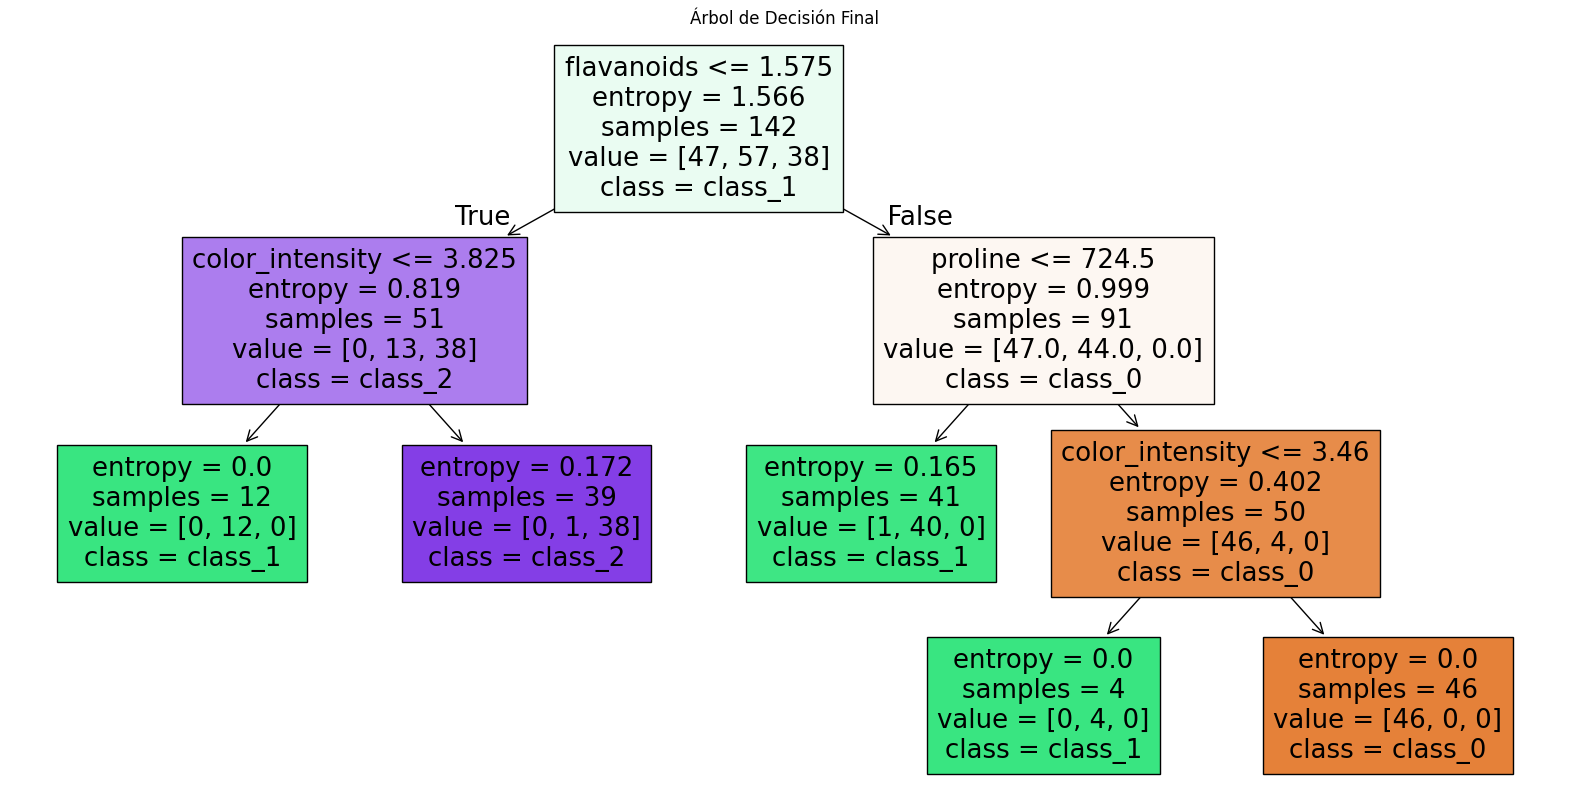

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_final, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Árbol de Decisión Final")
plt.show()


En la figura de arriba se aprecia el árbol de decisión final. Cada nodo muestra la condición de división (por ejemplo, flavanoids <= 1.57), junto con la impureza (criterio entropy en este caso), la cantidad de muestras que llegan a ese nodo y la distribución de clases. Los nodos coloreados indican la clase mayoritaria que el nodo (o hoja) predice. Vemos que el árbol no es excesivamente profundo, lo cual concuerda con los hiperparámetros de pre-poda que impusimos (min_impurity_decrease=0.07 evitó crecer ramas con poca ganancia). Este árbol final logra clasificar correctamente los vinos en el conjunto de prueba final con alta precisión, y su estructura permite interpretar qué características (por ejemplo, flavonoids, proline, color_intensity, etc.) fueron más informativas para distinguir entre las tres clases de vino.